Remaining classes after filtering: [1 2]
class
1    18
2    11
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_18564\962436044.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


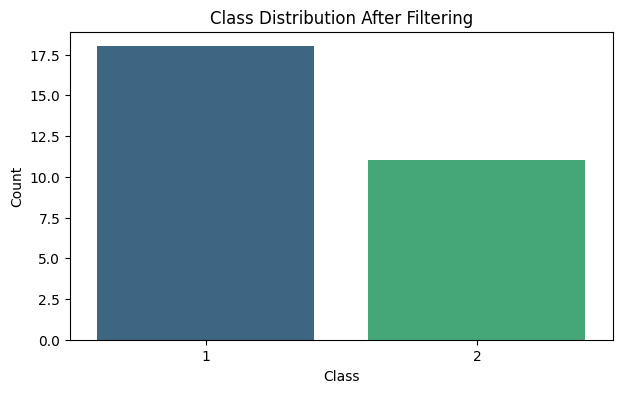

Data loaded successfully
Training set size: 20, Test set size: 9

Tuning KNN...
Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': np.int64(2), 'metric': 'minkowski'}
Best cross-validation score: 0.9048

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



C:\Users\User\AppData\Local\Temp\ipykernel_18564\962436044.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['mean_test_score'], palette="coolwarm")


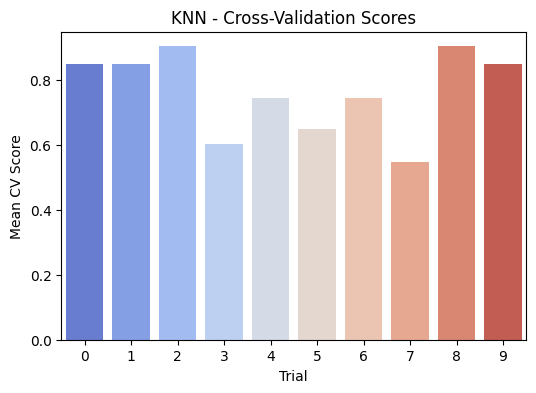


Tuning SVM...
Best parameters for SVM: {'kernel': 'poly', 'gamma': 'auto', 'C': 50}
Best cross-validation score: 0.7540

Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



C:\Users\User\AppData\Local\Temp\ipykernel_18564\962436044.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['mean_test_score'], palette="coolwarm")


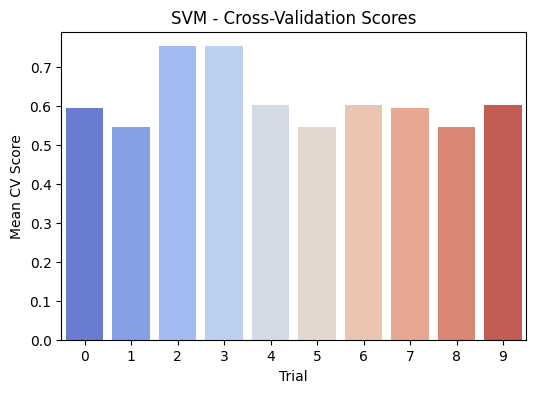


Tuning DecisionTree...
Best parameters for DecisionTree: {'min_samples_split': 5, 'max_depth': 5, 'criterion': 'entropy'}
Best cross-validation score: 0.8492

Classification Report (DecisionTree):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



C:\Users\User\AppData\Local\Temp\ipykernel_18564\962436044.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['mean_test_score'], palette="coolwarm")


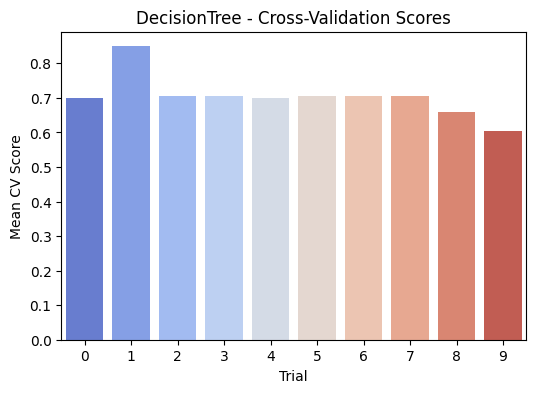


Tuning RandomForest...
Best parameters for RandomForest: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 5}
Best cross-validation score: 0.7540

Classification Report (RandomForest):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



C:\Users\User\AppData\Local\Temp\ipykernel_18564\962436044.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['mean_test_score'], palette="coolwarm")


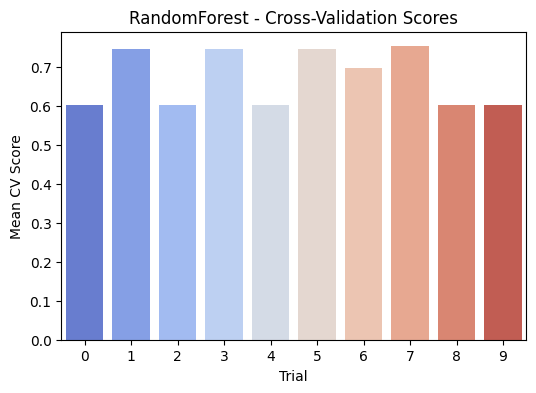


Performance Comparison:
          Model  Accuracy  F1 Score
0           KNN  0.888889  0.882051
1           SVM  0.888889  0.882051
2  DecisionTree  0.888889  0.882051
3  RandomForest  0.888889  0.882051


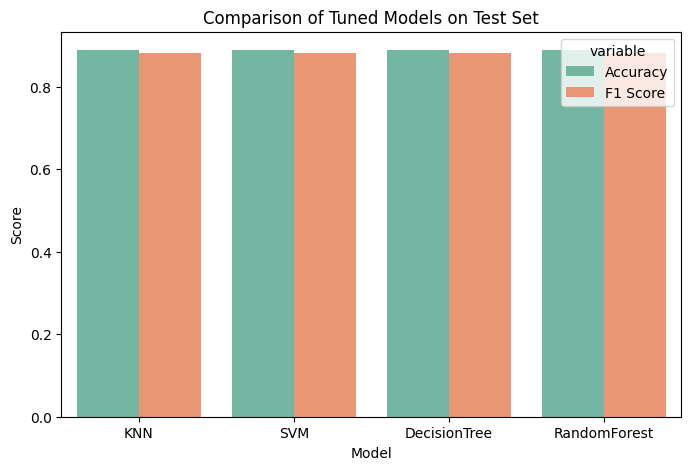

In [1]:
# A2: Hyperparameter Tuning with RandomizedSearchCV + Plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Step 1: Load dataset
file_path = r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
data = pd.read_csv(file_path)

# Features and target
feature_columns = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
X = data[feature_columns]
y = data['class']

# Step 2: Remove classes with <2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

print("Remaining classes after filtering:", y.unique())
print(y.value_counts())

# Plot class distribution
plt.figure(figsize=(7,4))
sns.countplot(x=y, palette="viridis")
plt.title("Class Distribution After Filtering")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Data loaded successfully")
print(f"Training set size: {len(X_train)}, Test set size: {len(X_test)}")

# Step 4: Define parameter grids
knn_params = {
    'n_neighbors': np.arange(1, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
svm_params = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

candidates = {
    "KNN": (KNeighborsClassifier(), knn_params),
    "SVM": (SVC(), svm_params),
    "DecisionTree": (DecisionTreeClassifier(), dt_params),
    "RandomForest": (RandomForestClassifier(), rf_params)
}

# Step 5: Hyperparameter tuning
tuned_models = {}
performance_summary = []

for model_name, (clf, param_grid) in candidates.items():
    print(f"\nTuning {model_name}...")
    
    tuner = RandomizedSearchCV(
        estimator=clf,
        param_distributions=param_grid,
        n_iter=10,
        cv=3,
        random_state=42,
        n_jobs=-1,
        return_train_score=True
    )
    
    tuner.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {tuner.best_params_}")
    print(f"Best cross-validation score: {tuner.best_score_:.4f}")
    
    tuned_models[model_name] = tuner.best_estimator_
    
    # Predictions on test set
    y_pred = tuner.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"\nClassification Report ({model_name}):")
    print(classification_report(y_test, y_pred))
    
    performance_summary.append({
        "Model": model_name,
        "Accuracy": acc,
        "F1 Score": f1
    })
    
    # Plot CV scores from RandomizedSearch
    results_df = pd.DataFrame(tuner.cv_results_)
    plt.figure(figsize=(6,4))
    sns.barplot(x=results_df.index, y=results_df['mean_test_score'], palette="coolwarm")
    plt.title(f"{model_name} - Cross-Validation Scores")
    plt.xlabel("Trial")
    plt.ylabel("Mean CV Score")
    plt.show()

# Step 6: Compare tuned models
perf_df = pd.DataFrame(performance_summary)

print("\nPerformance Comparison:")
print(perf_df)

# Plot performance comparison
plt.figure(figsize=(8,5))
sns.barplot(data=perf_df.melt(id_vars="Model"), x="Model", y="value", hue="variable", palette="Set2")
plt.title("Comparison of Tuned Models on Test Set")
plt.ylabel("Score")
plt.show()


In [ ]:
!pip install seaborn


Training Default KNN...
Classification Report (KNN - Default):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



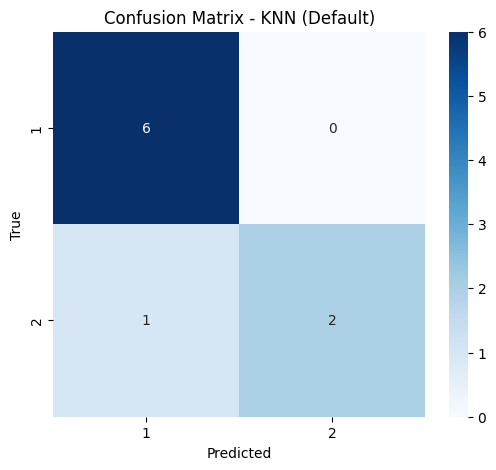

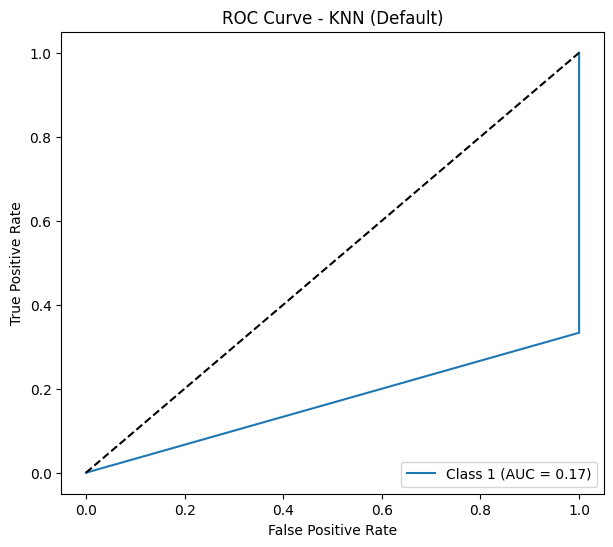


Training Default SVM...
Classification Report (SVM - Default):
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         3

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9



C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

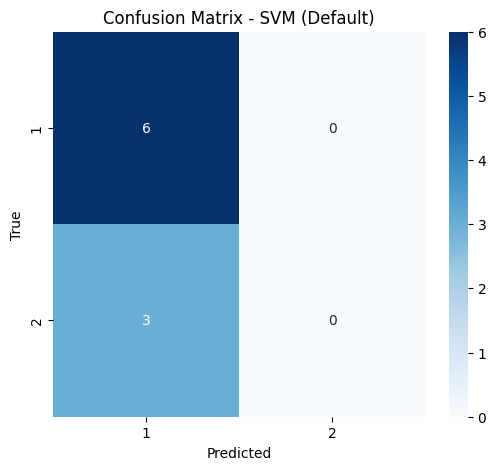

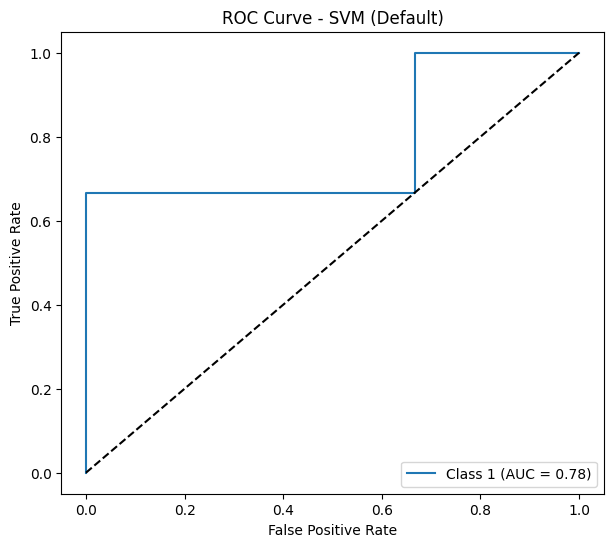


Training Default DecisionTree...
Classification Report (DecisionTree - Default):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



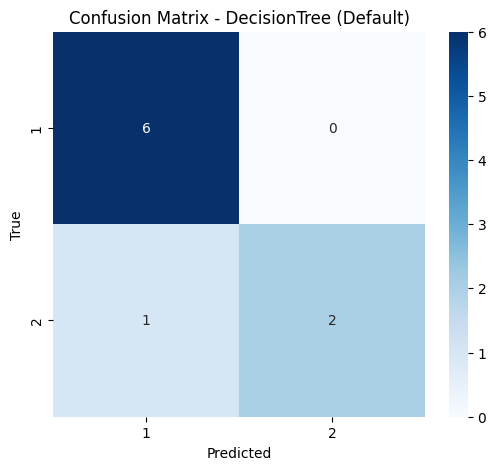

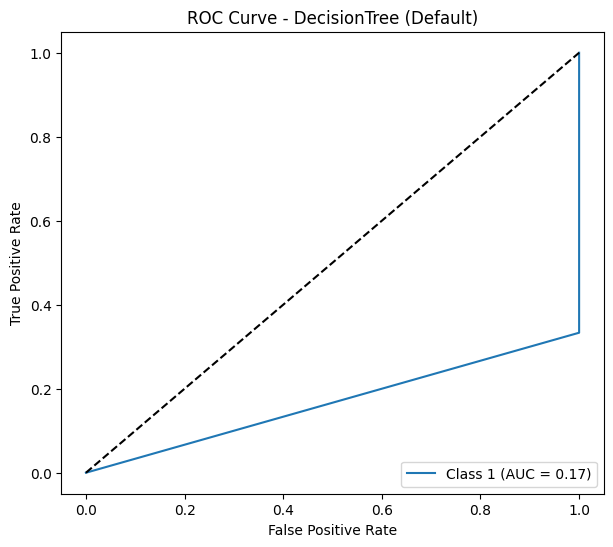


Training Default RandomForest...
Classification Report (RandomForest - Default):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



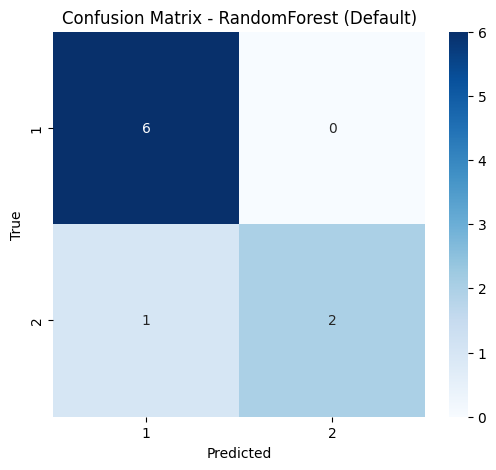

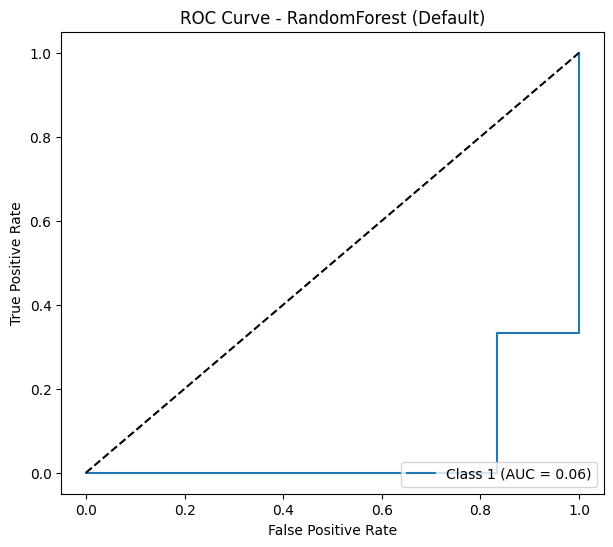


Evaluating Tuned KNN...
Classification Report (KNN - Tuned):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



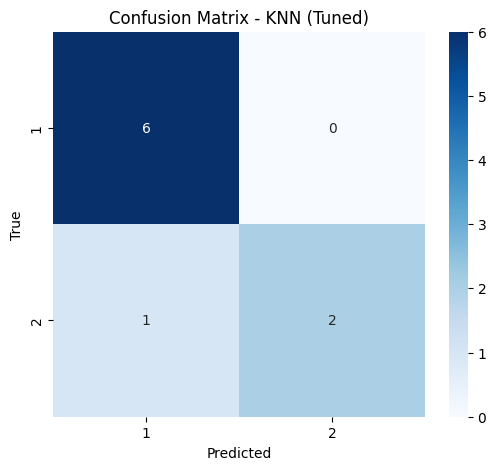

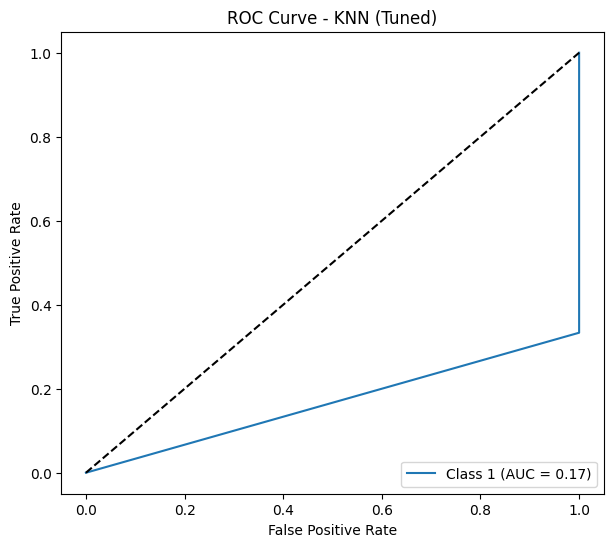


Evaluating Tuned SVM...
Classification Report (SVM - Tuned):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



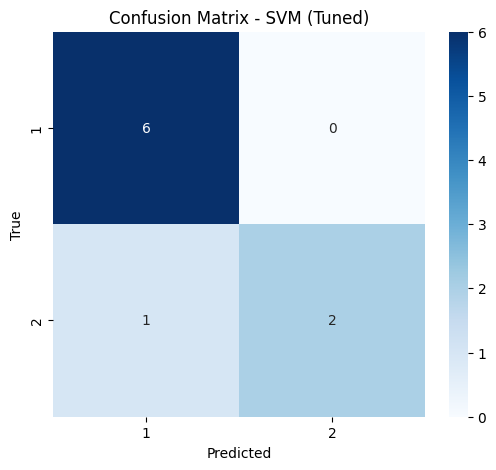

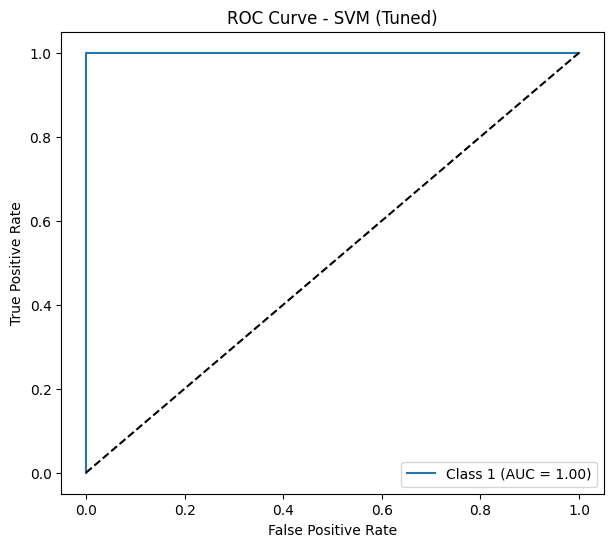


Evaluating Tuned DecisionTree...
Classification Report (DecisionTree - Tuned):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



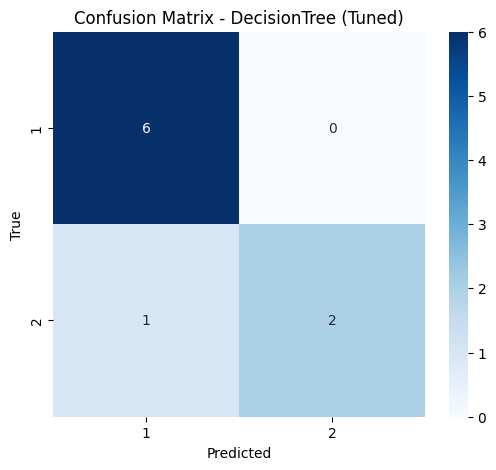

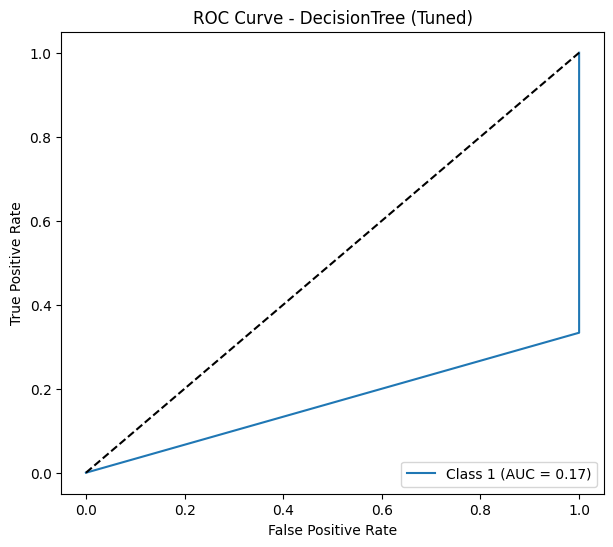


Evaluating Tuned RandomForest...
Classification Report (RandomForest - Tuned):
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9



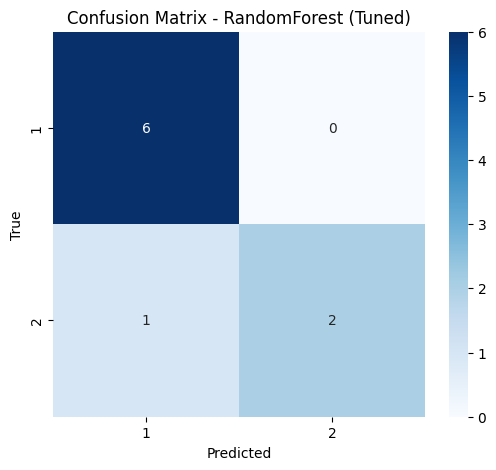

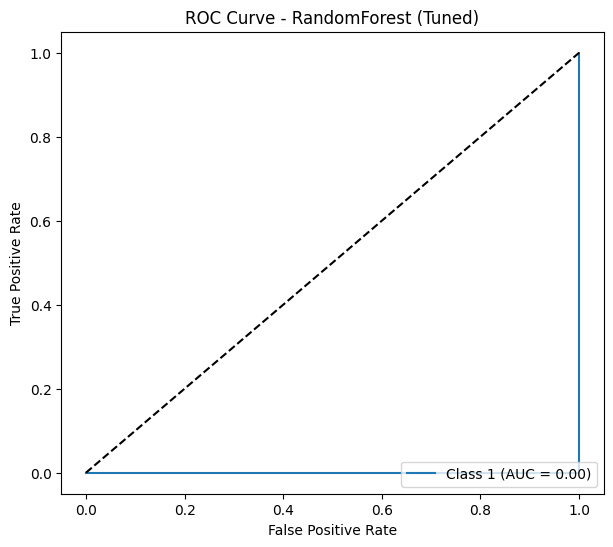


Final Comparison: Default vs Tuned Models
          Model  Accuracy_Default  F1 Score_Default  Accuracy_Tuned  \
0           KNN          0.888889          0.882051        0.888889   
1           SVM          0.666667          0.533333        0.888889   
2  DecisionTree          0.888889          0.882051        0.888889   
3  RandomForest          0.888889          0.882051        0.888889   

   F1 Score_Tuned  
0        0.882051  
1        0.882051  
2        0.882051  
3        0.882051  


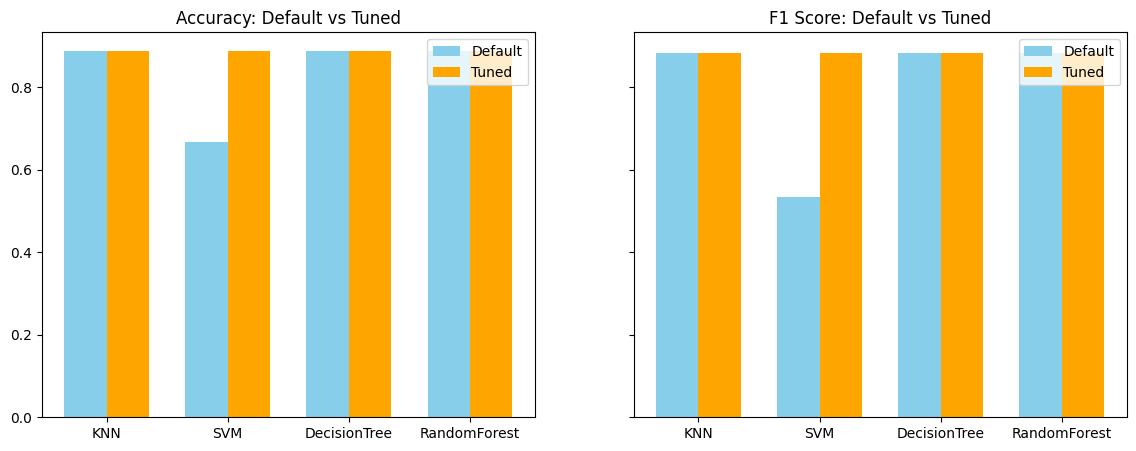

In [2]:
# A3: Train & Compare Classifiers (Default vs Tuned Models) + Confusion Matrices + ROC Curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score, confusion_matrix,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# Step 1: Load dataset
file_path = r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
data = pd.read_csv(file_path)

feature_columns = ['mfcc1', 'rms', 'zcr', 'pitch_std', 'silence_pct']
X = data[feature_columns]
y = data['class']

# Remove classes with <2 samples
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Helper: Plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name, tuned=False):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name} ({'Tuned' if tuned else 'Default'})")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Helper: Plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name, tuned=False):
    y_classes = np.unique(y)
    y_bin = label_binarize(y_test, classes=y_classes)
    n_classes = y_bin.shape[1]

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    # Fix: ensure y_score is always 2D
    if y_score.ndim == 1:
        y_score = y_score.reshape(-1, 1)

    fpr, tpr, roc_auc = {}, {}, {}

    plt.figure(figsize=(7,6))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i],
                 label=f"Class {y_classes[i]} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.title(f"ROC Curve - {model_name} ({'Tuned' if tuned else 'Default'})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Step 2: Default Models Training
default_models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),  # enable probability for ROC
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

default_results = []

for name, model in default_models.items():
    print(f"\nTraining Default {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")

    print(f"Classification Report ({name} - Default):")
    print(classification_report(y_test, preds))

    default_results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

    plot_conf_matrix(y_test, preds, name, tuned=False)
    plot_roc_curve(model, X_test, y_test, name, tuned=False)

df_default = pd.DataFrame(default_results)

# Step 3: Tuned Models (From A2)
tuned_results = []

for name, model in tuned_models.items():
    print(f"\nEvaluating Tuned {name}...")
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")

    print(f"Classification Report ({name} - Tuned):")
    print(classification_report(y_test, preds))

    tuned_results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

    plot_conf_matrix(y_test, preds, name, tuned=True)
    plot_roc_curve(model, X_test, y_test, name, tuned=True)

df_tuned = pd.DataFrame(tuned_results)

# Step 4: Final Comparison (Default vs Tuned)
comparison = pd.merge(df_default, df_tuned, on="Model", suffixes=("_Default", "_Tuned"))

print("\nFinal Comparison: Default vs Tuned Models")
print(comparison)

# Comparison bar plots
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)
x = np.arange(len(comparison["Model"]))
width = 0.35

axes[0].bar(x - width/2, comparison["Accuracy_Default"], width=width, label="Default", color="skyblue")
axes[0].bar(x + width/2, comparison["Accuracy_Tuned"], width=width, label="Tuned", color="orange")
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison["Model"])
axes[0].set_title("Accuracy: Default vs Tuned")
axes[0].legend()

axes[1].bar(x - width/2, comparison["F1 Score_Default"], width=width, label="Default", color="skyblue")
axes[1].bar(x + width/2, comparison["F1 Score_Tuned"], width=width, label="Tuned", color="orange")
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison["Model"])
axes[1].set_title("F1 Score: Default vs Tuned")
axes[1].legend()

plt.show()


In [ ]:
!pip install shap

In [ ]:
!pip install "numpy<=2.2" --upgrade --force-reinstall


=== RandomForest SHAP Feature Importance ===
       Feature  RandomForest_SHAP
0        mfcc1           0.149587
1          rms           0.149587
2    pitch_std           0.119242
3          zcr           0.119242
4  silence_pct           0.020178


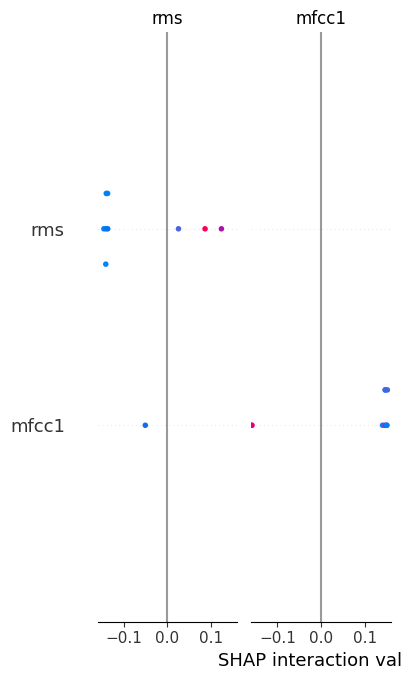

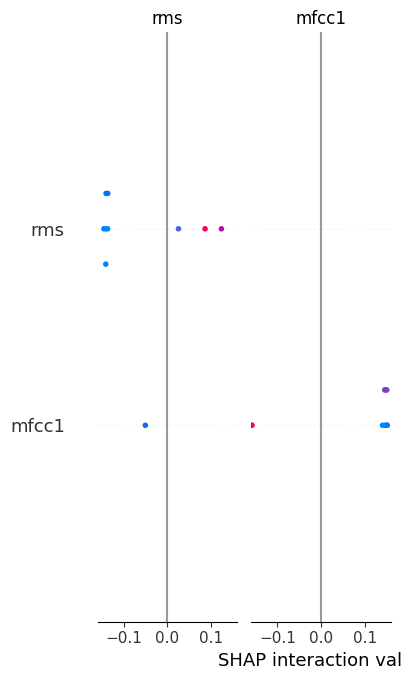


=== Logistic Regression SHAP Feature Importance ===
       Feature  LogisticReg_SHAP
0    pitch_std          0.321707
1  silence_pct          0.305180
2        mfcc1          0.157731
3          rms          0.000065
4          zcr          0.000013


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


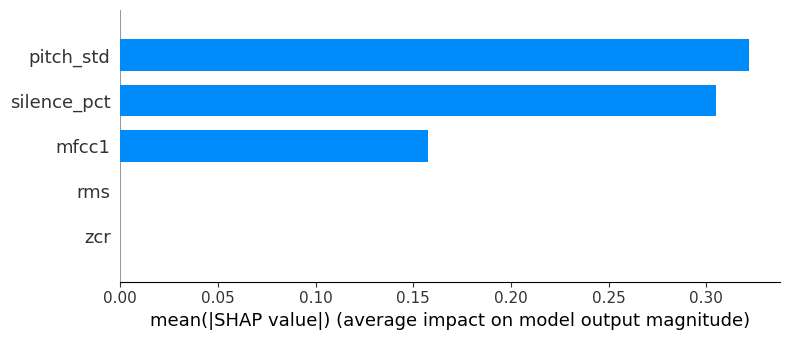

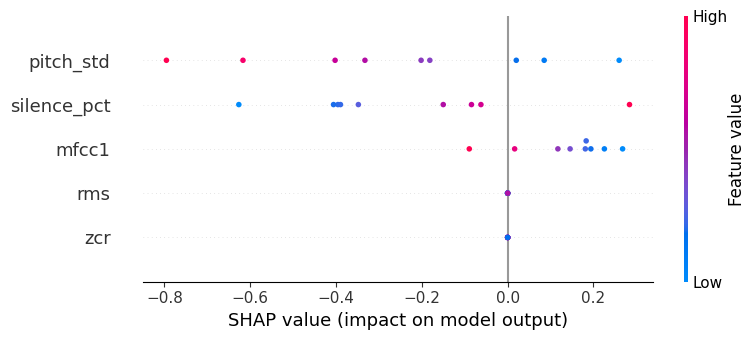


=== SHAP Comparison (RandomForest vs Logistic Regression) ===
       Feature  RandomForest_SHAP  LogisticReg_SHAP
0        mfcc1           0.149587          0.157731
1    pitch_std           0.119242          0.321707
2          rms           0.149587          0.000065
3  silence_pct           0.020178          0.305180
4          zcr           0.119242          0.000013


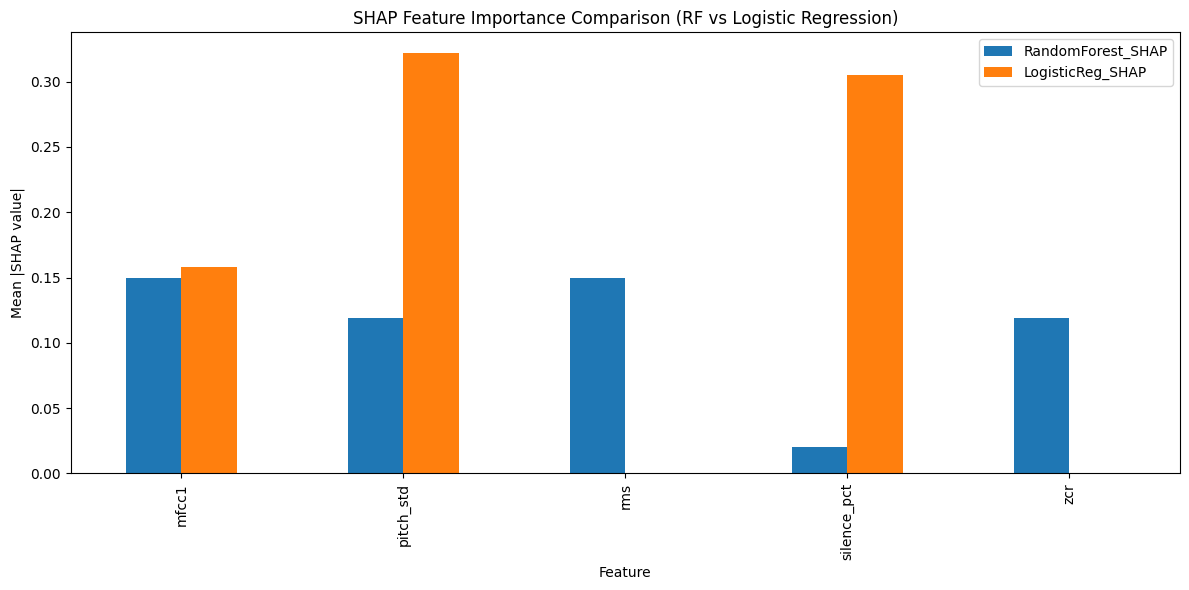

In [21]:
# SHAP Explainability for RF & Logistic Regression

# Step 1: Imports
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 2: Load dataset
data_path = r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv"
data = pd.read_csv(data_path)

# Step 3: Prepare features and target
X = data.drop(columns=["class"])
X = X.select_dtypes(include=[np.number])   # keep only numeric features
y = data["class"]
feature_columns = X.columns

# Step 4: Handle rare classes (<2 samples)
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= 2].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Step 5: Train-test split (safe stratification)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

# Step 6: Train models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

log_model = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
log_model.fit(X_train, y_train)

# Step 7: Helper function to extract SHAP importance
def get_shap_importance(explainer, shap_values, X, model_name):
    if isinstance(shap_values, list):  # Tree models may return list
        values = np.mean([np.abs(sv) for sv in shap_values], axis=0)
    else:
        values = shap_values

    feature_importance = np.mean(np.abs(values), axis=0).flatten()
    features = list(X.columns)

    min_len = min(len(features), len(feature_importance))
    features = features[:min_len]
    feature_importance = feature_importance[:min_len]

    df_importance = pd.DataFrame({
        "Feature": features,
        f"{model_name}_SHAP": feature_importance
    }).sort_values(by=f"{model_name}_SHAP", ascending=False).reset_index(drop=True)

    return df_importance, values

# Step 8: RandomForest SHAP analysis
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test)
rf_importance, rf_vals = get_shap_importance(rf_explainer, rf_shap_values, X_test, "RandomForest")

print("\n=== RandomForest SHAP Feature Importance ===")
print(rf_importance)

shap.summary_plot(rf_vals, X_test, feature_names=feature_columns, plot_type="bar")
shap.summary_plot(rf_vals, X_test, feature_names=feature_columns)

# Step 9: Logistic Regression SHAP analysis
# Corrected feature_perturbation to a valid option: 'interventional' (or 'correlation_dependent')
log_explainer = shap.LinearExplainer(log_model, X_train, feature_perturbation="interventional")
log_shap_values = log_explainer.shap_values(X_test)
log_importance, log_vals = get_shap_importance(log_explainer, log_shap_values, X_test, "LogisticReg")

print("\n=== Logistic Regression SHAP Feature Importance ===")
print(log_importance)

shap.summary_plot(log_vals, X_test, feature_names=feature_columns, plot_type="bar")
shap.summary_plot(log_vals, X_test, feature_names=feature_columns)

# Step 10: Comparison Table
comparison = rf_importance.merge(log_importance, on="Feature", how="outer")
print("\n=== SHAP Comparison (RandomForest vs Logistic Regression) ===")
print(comparison)

# Step 11: Plot comparison
comparison.set_index("Feature").plot(kind="bar", figsize=(12,6))
plt.title("SHAP Feature Importance Comparison (RF vs Logistic Regression)")
plt.ylabel("Mean |SHAP value|")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [16]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 4.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/12.9 MB 5.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.9 MB 4.8 MB/s eta 0:00:03
   ----------- ---------------------------- 3.7/12.9 MB 5.0 MB/s eta 0:00:02
   --------------- ------------------------ 5.0/12.9 MB 5.1 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.9 MB 5.2 MB/s eta 0:00:02
   ------------------------ --------------- 7.9/12.9 MB 5.6 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

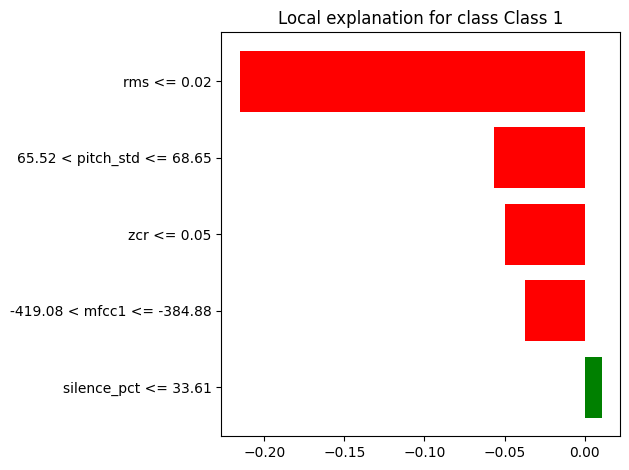

In [19]:
# O2: LIME Explainability

# Import required libraries
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Assuming you already have: X_train, X_test, y_train, y_test, rf_model

# Step 1: Create LIME explainer for tabular data
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,           # LIME uses training data to generate local samples
    feature_names=X_train.columns.tolist(), # List of feature names
    class_names=["Class 0", "Class 1"],     # Adjust to your dataset labels
    mode="classification"
)

# Step 2: Pick one instance from test set to explain
i = 5  # index of sample to explain
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i],     # Keep as Series to retain feature names
    predict_fn=rf_model.predict_proba,
    num_features=10              # Top 10 features contributing to prediction
)

# Step 3: Display explanation using matplotlib (works in Jupyter)
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()
